In [1]:
print("Retail Sales Analysis Project Started")


Retail Sales Analysis Project Started


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
df = pd.read_csv("data/train.csv", encoding='latin1')

In [10]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.shape

(9800, 18)

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [16]:
import pandas as pd 
#convert 'order Date' to datetime 
df['Order Date'] =pd.to_datetime(df['Order Date'],dayfirst=True)
df['Order Date'].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

In [18]:
#Create 'Month-Year' column from 'Order Date'
df['Month-Year'] =df['Order Date'].dt.to_period('M')

# Check first few rows with the correct column names
df[['Order Date', 'Month-Year']].head()


,Order Date,Month-Year
0,2017-11-08,2017-11
1,2017-11-08,2017-11
2,2017-06-12,2017-06
3,2016-10-11,2016-10
4,2016-10-11,2016-10


In [19]:
#Group by 'Month-Year' and sum the sales 
monthly_revenue = df.groupby('Month-Year')['Sales'].sum().reset_index()

#Check first few rows
monthly_revenue.head()

,Month-Year,Sales
0,2015-01,14205.707
1,2015-02,4519.892
2,2015-03,55205.797
3,2015-04,27906.855
4,2015-05,23644.303


In [31]:
monthly_revenue = monthly_revenue.sort_values('Month-Year')

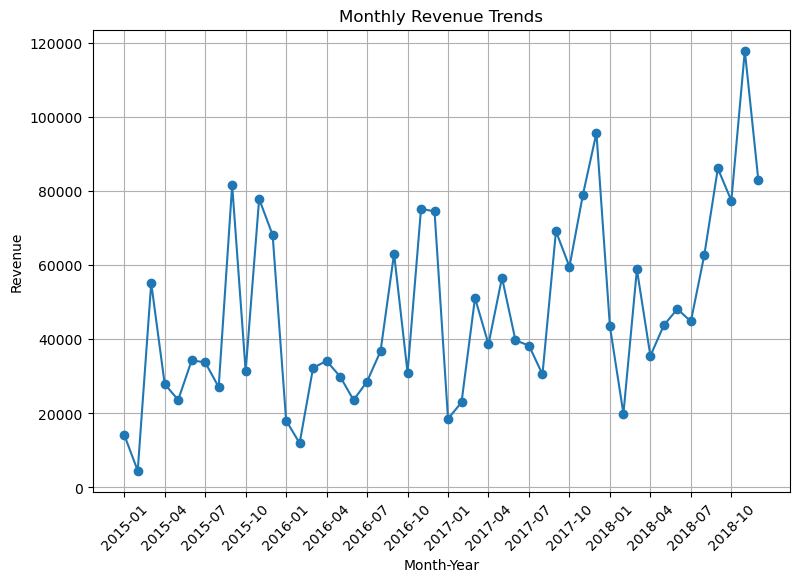

In [33]:
plt.figure(figsize=(9,6))
plt.plot(monthly_revenue['Month-Year'].astype(str), monthly_revenue['Sales'], marker='o')
plt.xticks(monthly_revenue['Month-Year'].astype(str)[::3], rotation=45)  # Show every 3rd month
plt.title('Monthly Revenue Trends')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


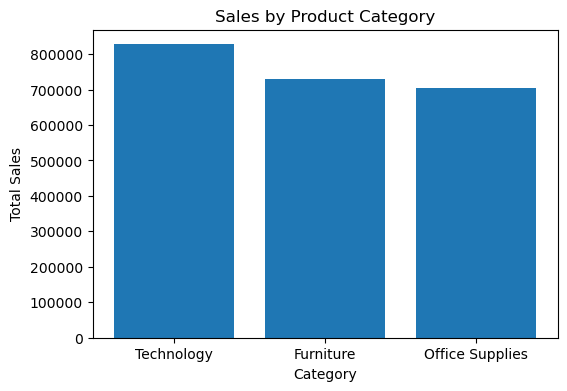

In [36]:
#Category-wise total sales
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

#sort descending
category_sales = category_sales.sort_values('Sales',ascending=False)

#plot bar chart
plt.figure(figsize=(6,4))
plt.bar(category_sales['Category'], category_sales['Sales'])
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [38]:
#Top 10 customers by total sales
top_customers =(
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

In [39]:
#bottom 10 products by total sales
slow_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values()
    .head(10)
)
slow_products

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Acme Serrated Blade Letter Opener                                   7.632
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Name: Sales, dtype: float64

In [41]:
import sqlite3

# Create connection to SQLite database 
conn = sqlite3.connect("sales.db")

# Save dataframe to SQL table
df['Month-Year'] = df['Month-Year'].astype(str)
df.to_sql("sales",conn, if_exists="replace",index=False)

print("Data save to SQL successfully")

Data save to SQL successfully


In [42]:
query ="""
SELECT Region, SUM(Sales) AS Total_Sales
From sales
GROUP BY Region
ORDER BY Total_Sales DESC 
"""
pd.read_sql(query,conn)

,Region,Total_Sales
0,West,710219.6845
1,East,669518.7260
2,Central,492646.9132
3,South,389151.4590


In [43]:
query ="""
SELECT strftime('%Y-%m', "Order Date") AS Month,
        SUM(Sales) AS Monthly_Sales
FROM sales
GROUP BY Month
ORDER BY Month
"""
pd.read_sql(query,conn)

,Month,Monthly_Sales
0,2015-01,14205.7070
1,2015-02,4519.8920
2,2015-03,55205.7970
3,2015-04,27906.8550
4,2015-05,23644.3030
5,2015-06,34322.9356
6,2015-07,33781.5430
7,2015-08,27117.5365
8,2015-09,81623.5268
9,2015-10,31453.3930


In [44]:
query = """
SELECT "Product Name", SUM(Sales) AS Total_Sales
FROM sales
GROUP BY "Product Name"
ORDER BY  Total_Sales DESC 
LIMIT 10
"""
pd.read_sql(query,conn)

,Product Name,Total_Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


In [45]:
df.to_csv("data/superstore_cleaned.csv", index=False)
